In [4]:
# current date, for retrieving data from proper location.
year = "2023"
month = "August"
day = "26"

## Imports and initialization

In [5]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [6]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

import imp
def reloadAll(day_=None, diplsayErrors=False):
    for module in sys.modules.values():
        try:
            reload(module)
        except NotImplementedError:
            if diplsayErrors:
                print(module, 'NotImplementedError')
        except AttributeError:
            if diplsayErrors:
                print(module, 'AttributeError')
        except TypeError:
            if diplsayErrors:
                print(module, 'ValueError')
        except ImportError:
            if diplsayErrors:
                print(module, 'ImportError')
    if day_ is None:
        day_ = day
    setPath(day_,month,year)

In [7]:
atomlocs = [2, 2, 3, 3, 1]

In [8]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

In [9]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

### File 30 (2_0_rate_measurement):  

Number of Pictures: 320; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 20;	Exp File Version: 4;
Experiment started at (H:M:S) 16:10:25: on (Y-M-D) 2023-8-28, And ended at 16:11:58: on 2023-8-28
Experiment Notes:  



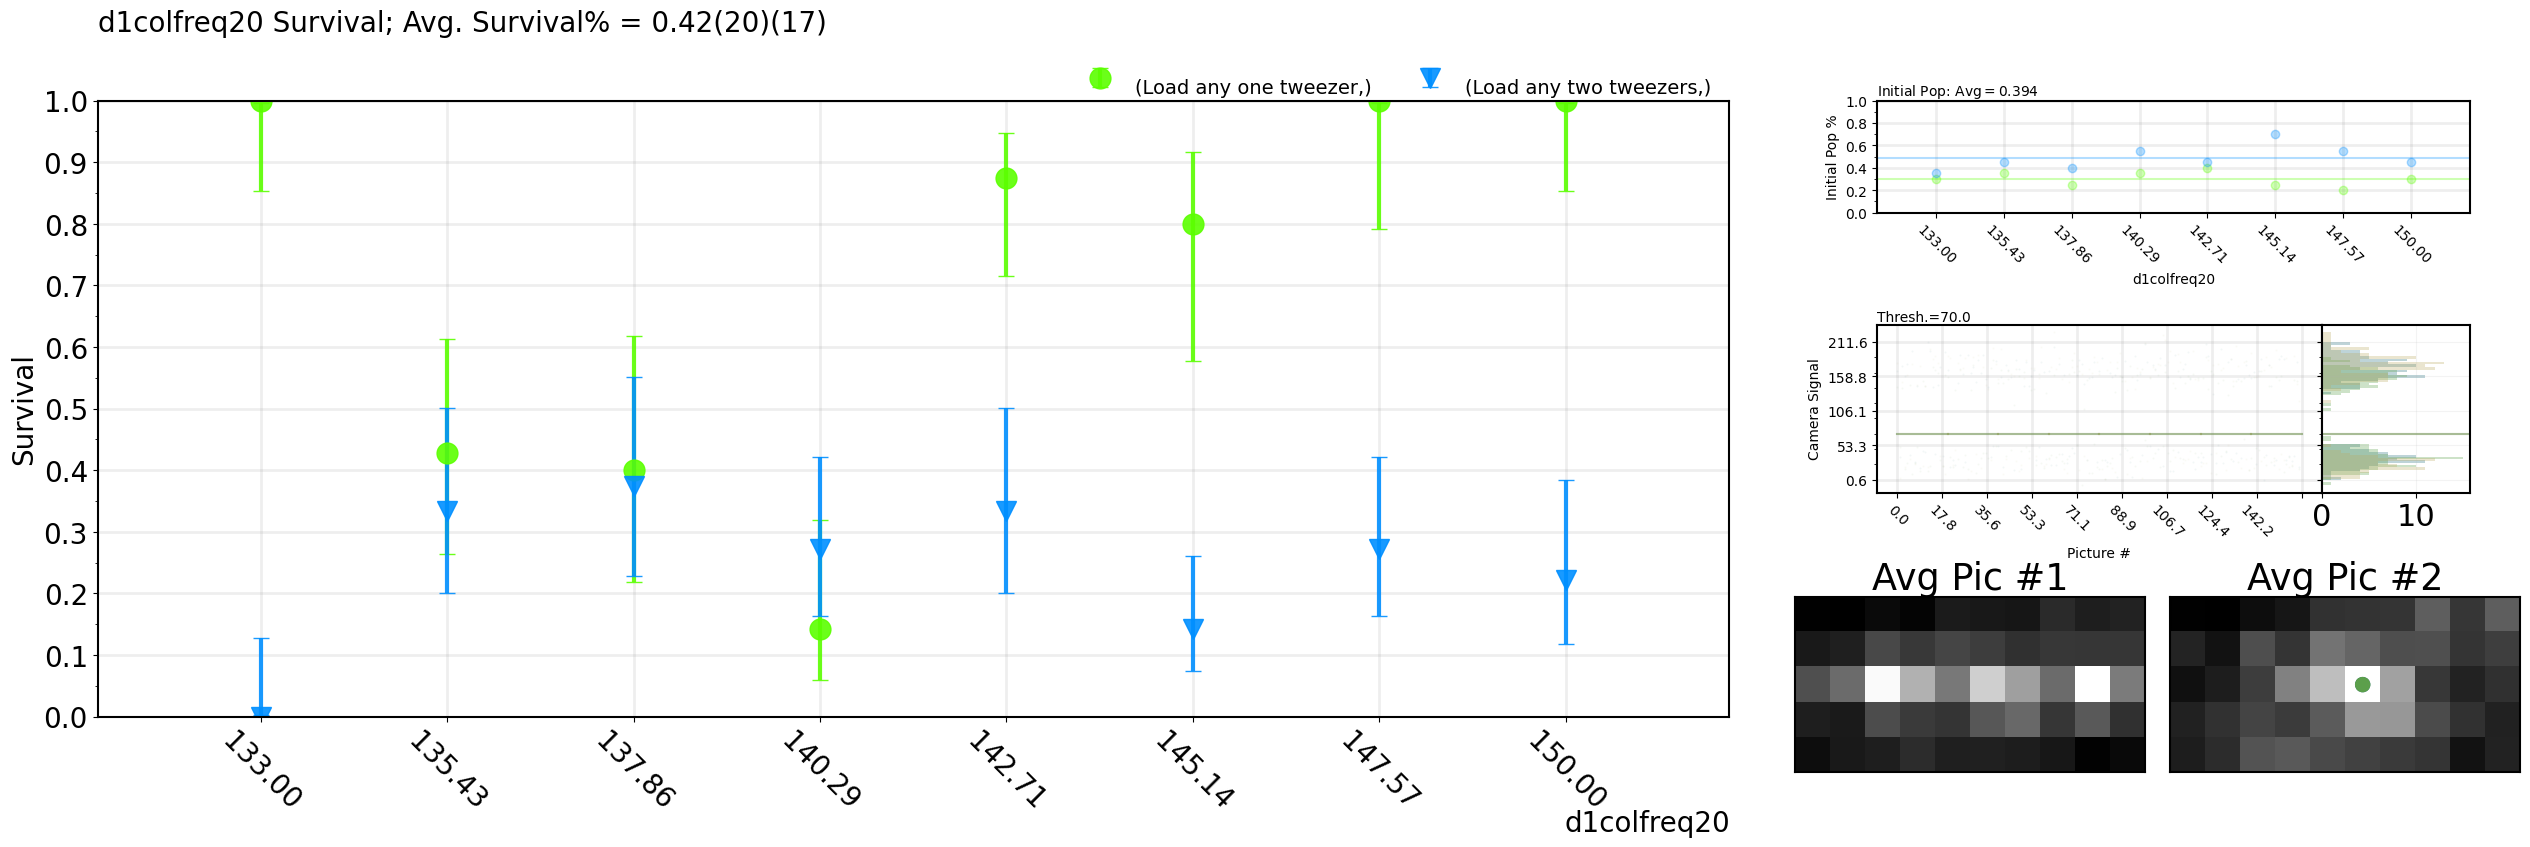

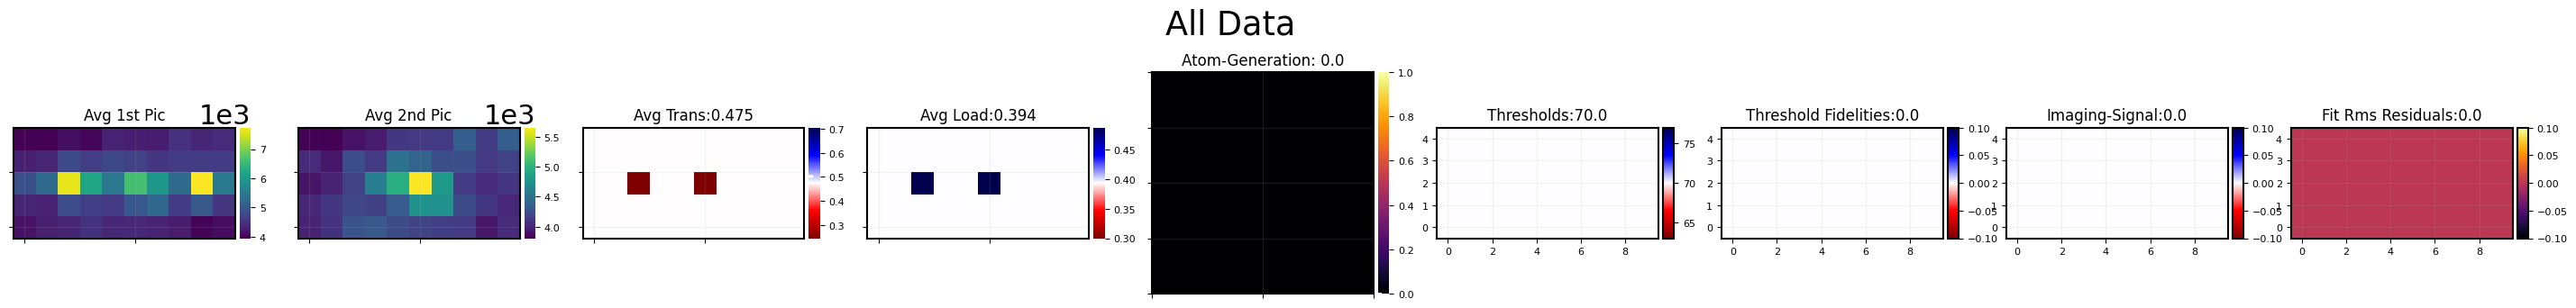

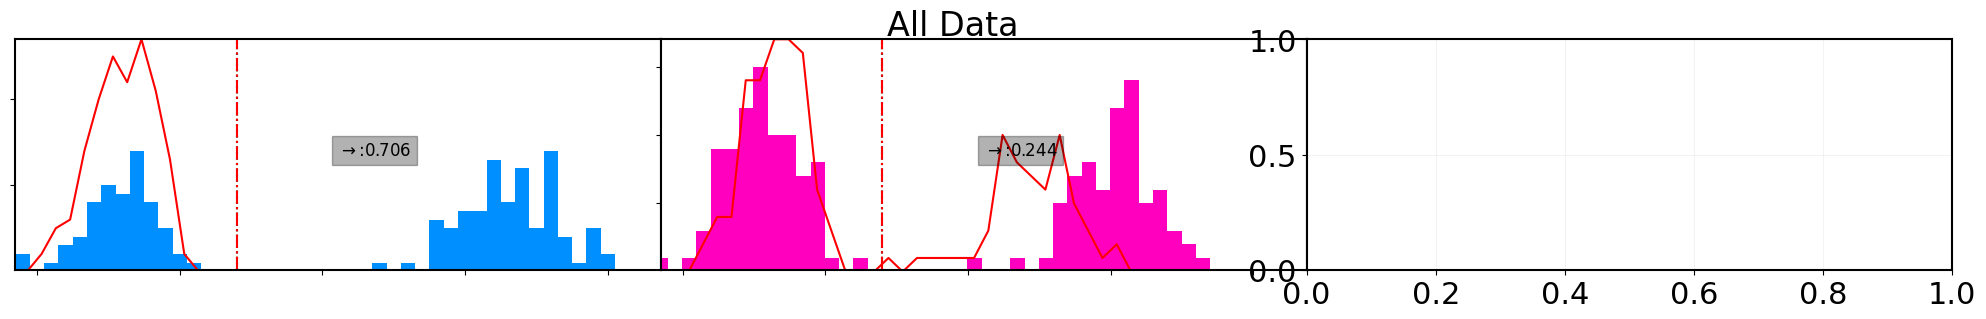

In [89]:
mp.Transfer(30, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 70)]);

### File 34 (2_0_rate_measurement):  

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 16:29:34: on (Y-M-D) 2023-8-28, And ended at 16:41:20: on 2023-8-28
Experiment Notes:  



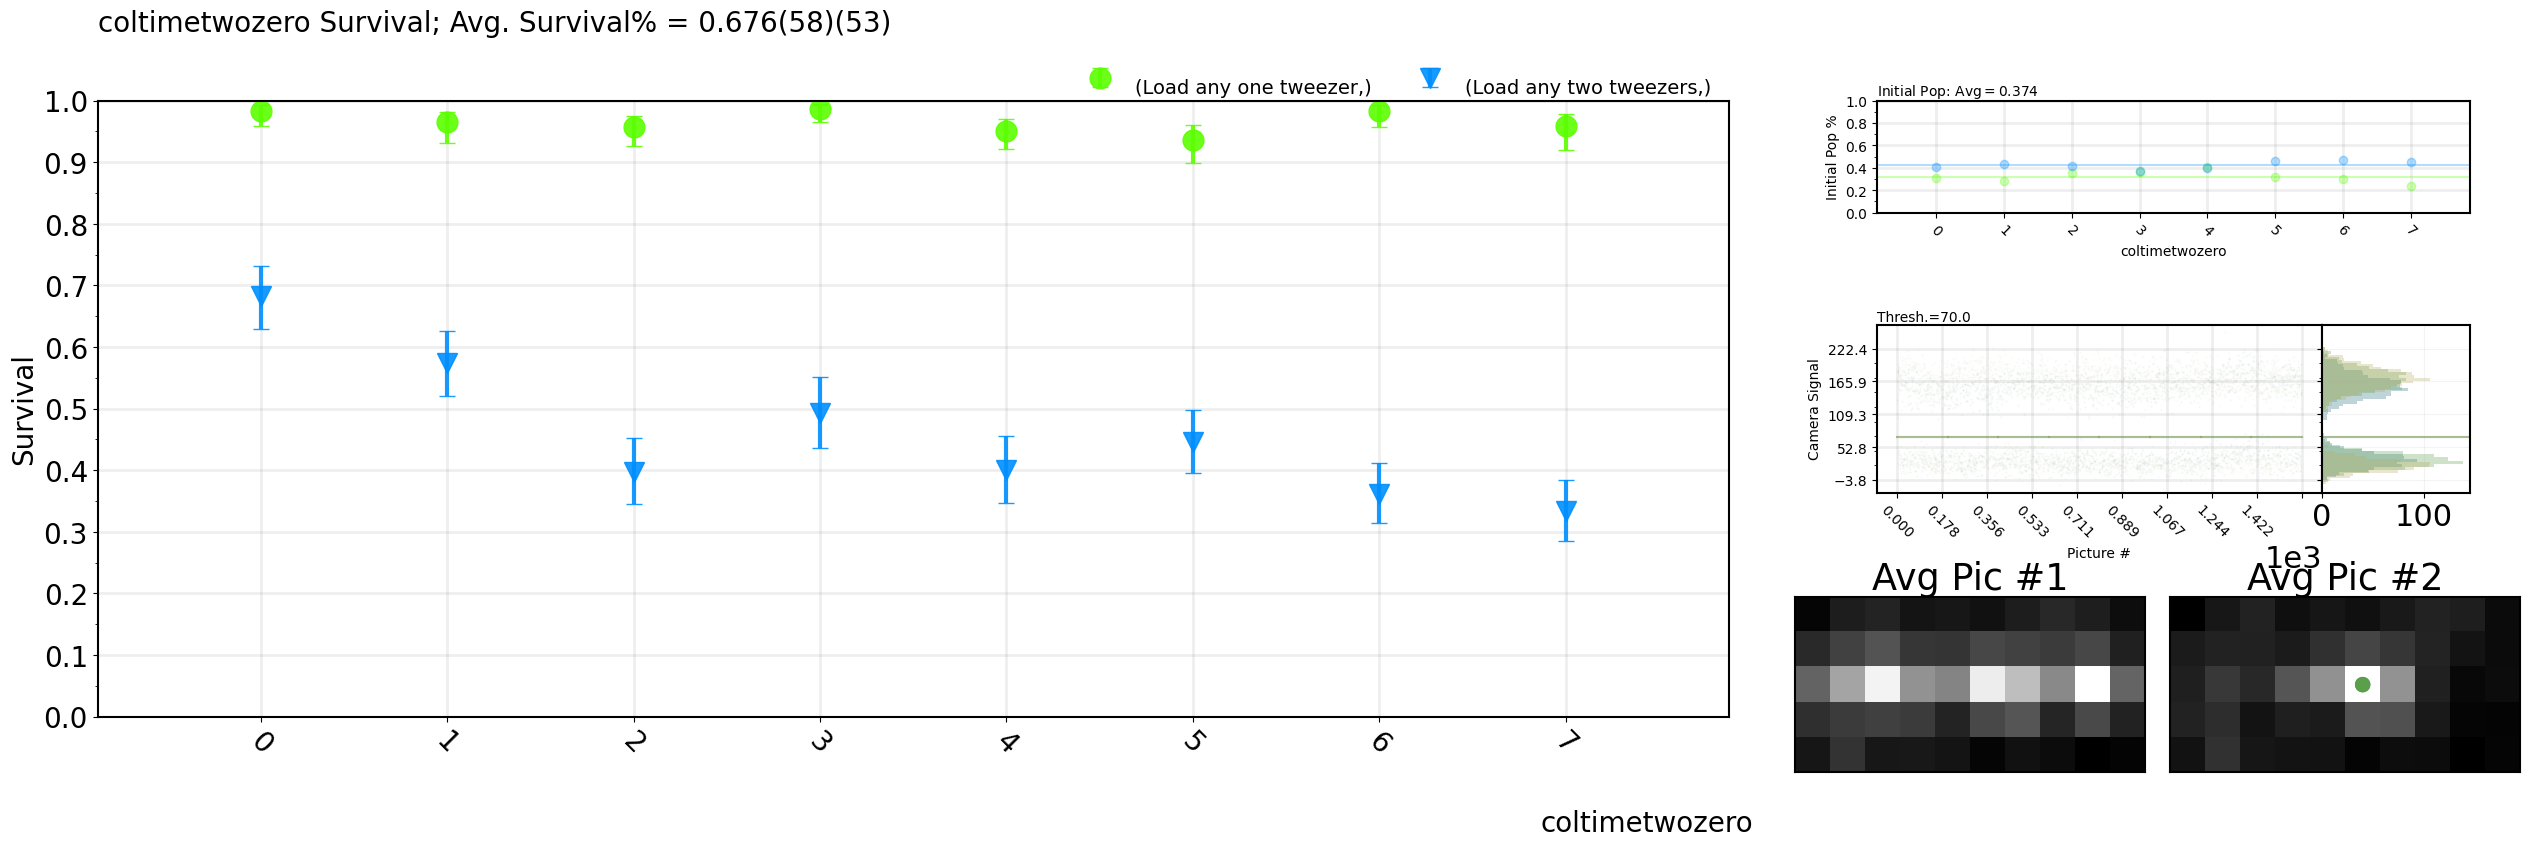

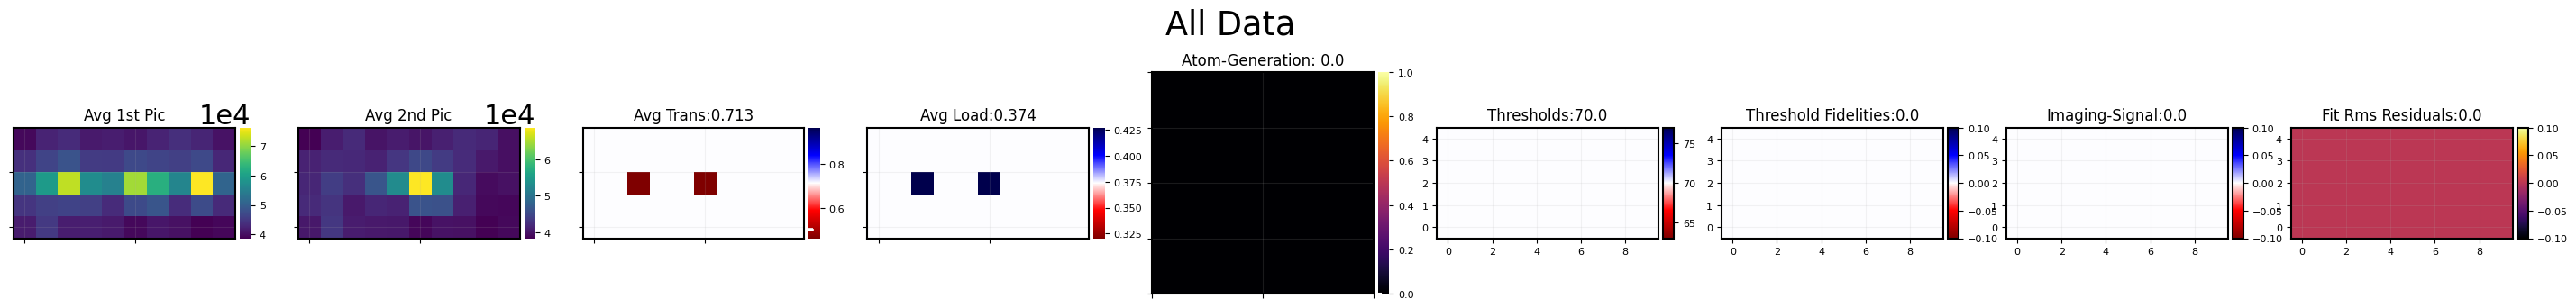

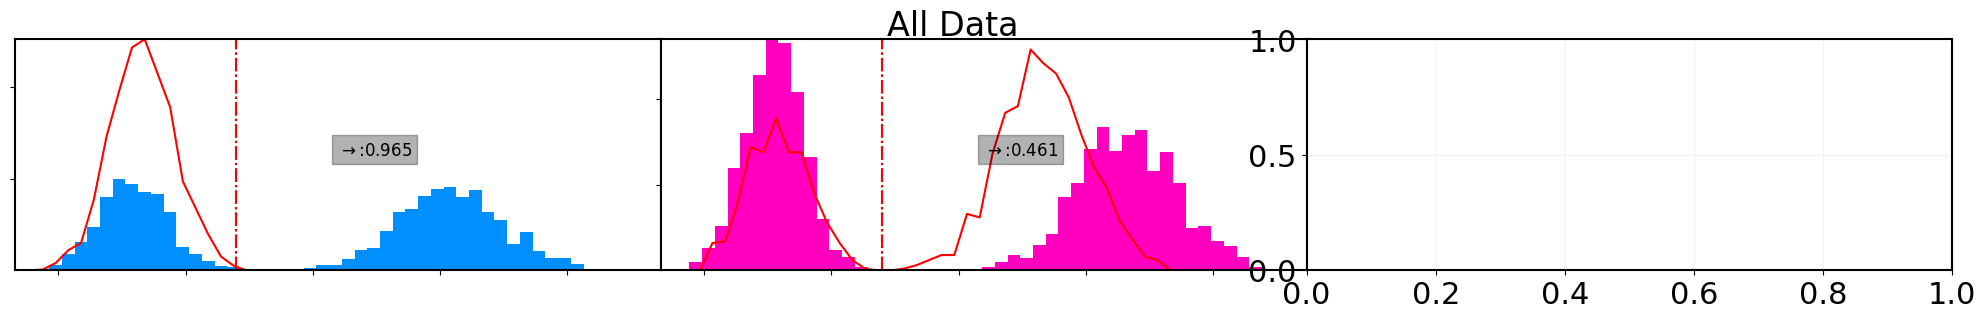

In [92]:
mp.Transfer(34, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 70)]);

# D1 F=2-1' Blue

## 700 MHz

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:3:27: on (Y-M-D) 2023-8-28, And ended at 15:9:42: on 2023-8-28
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

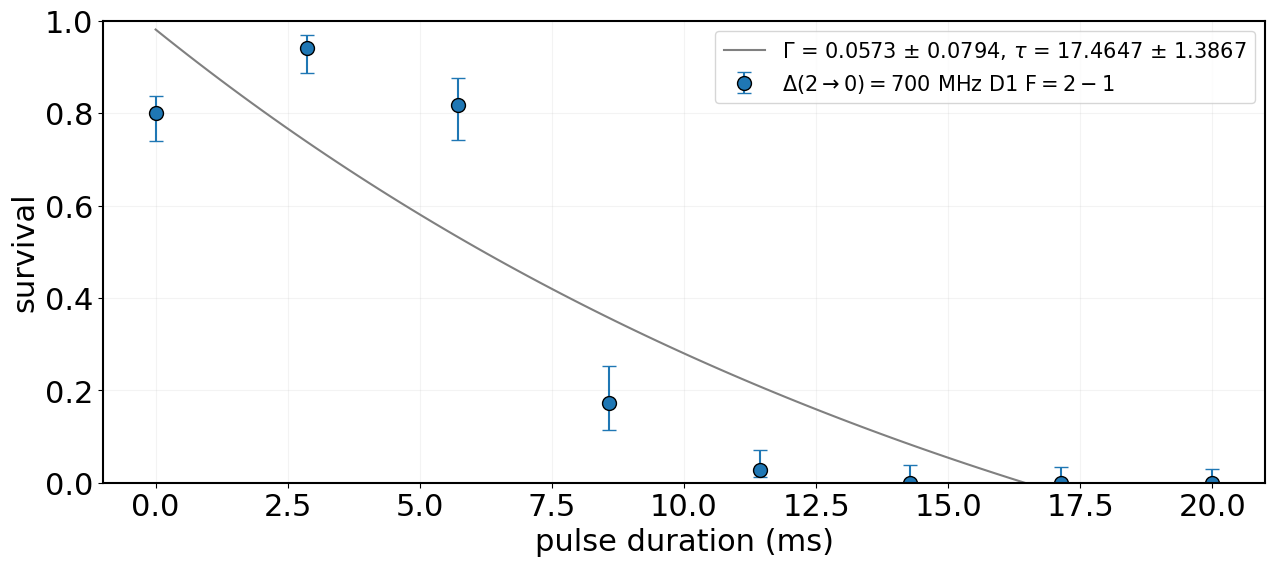

In [86]:
##pulse duration
reloadMyModules(28)
fileId = 29
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[3] = 0.3
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 700 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_700 = decay_constant
gamma_700_unc = decay_constant_uncertainty
tau_700 = one_over_e_time
tau_700_unc = one_over_e_time_uncertainty

## 650 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:5:10: on (Y-M-D) 2023-8-28, And ended at 14:16:55: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

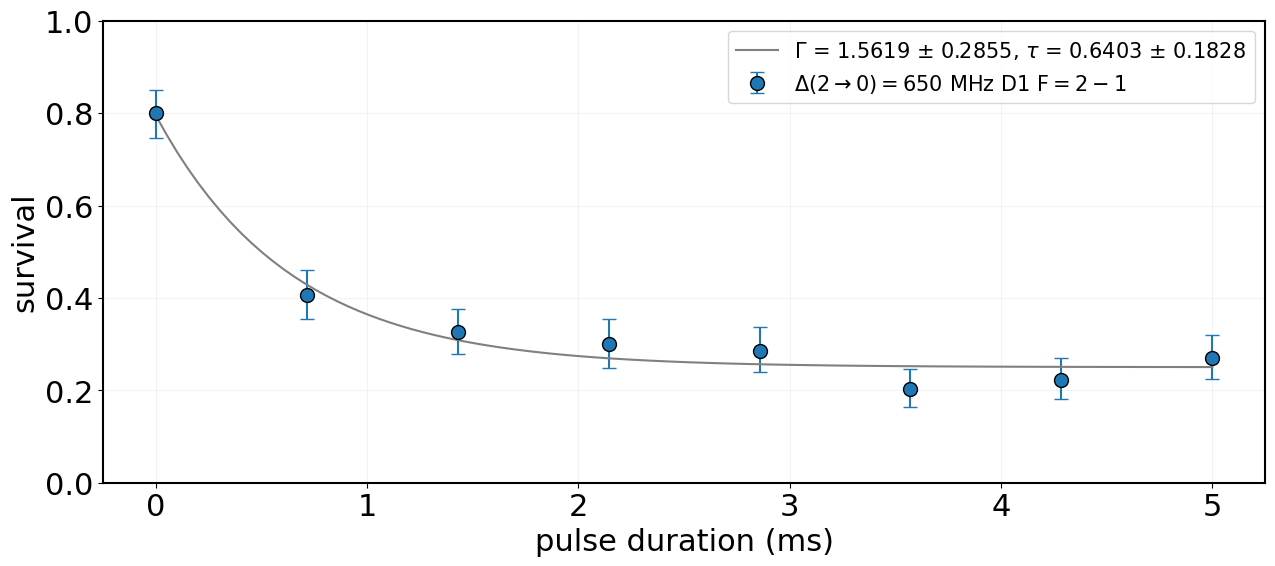

In [67]:
##pulse duration
reloadMyModules(28)
fileId = 24
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
avgTferData1[3] = 0.3
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 650 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_650 = decay_constant
gamma_650_unc = decay_constant_uncertainty
tau_650 = one_over_e_time
tau_650_unc = one_over_e_time_uncertainty

## 600 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:51:2: on (Y-M-D) 2023-8-28, And ended at 14:2:50: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

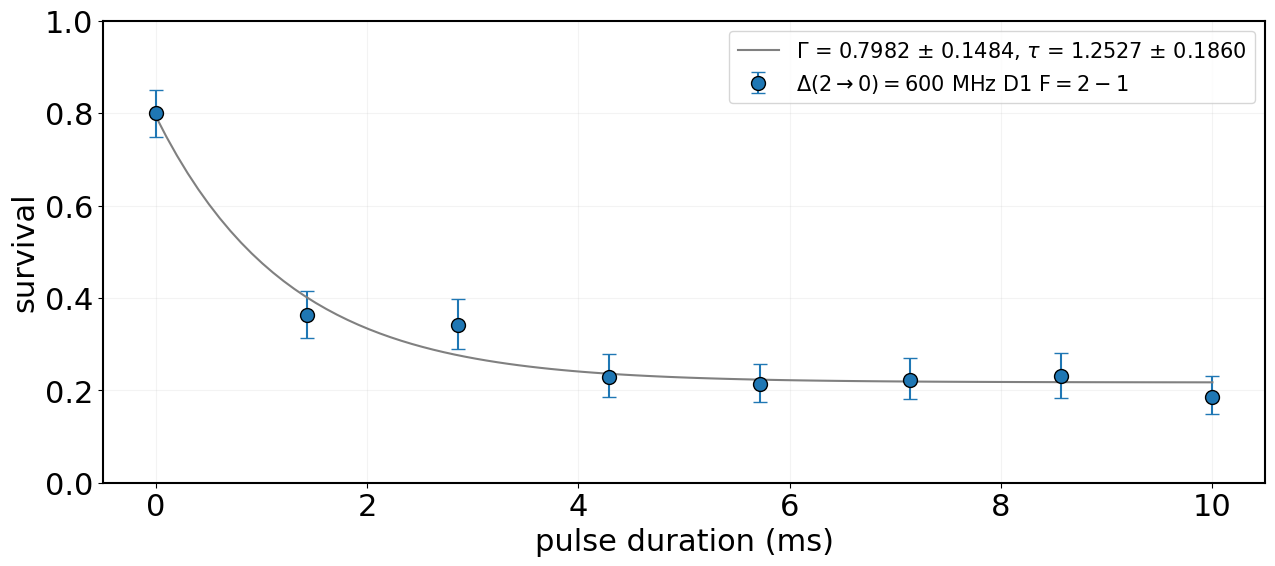

In [63]:
##pulse duration
reloadMyModules(28)
fileId = 23
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
avgTferData1[6] = 0.23
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 600 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_600 = decay_constant
gamma_600_unc = decay_constant_uncertainty
tau_600 = one_over_e_time
tau_600_unc = one_over_e_time_uncertainty

## 550 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:28:31: on (Y-M-D) 2023-8-28, And ended at 13:40:19: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

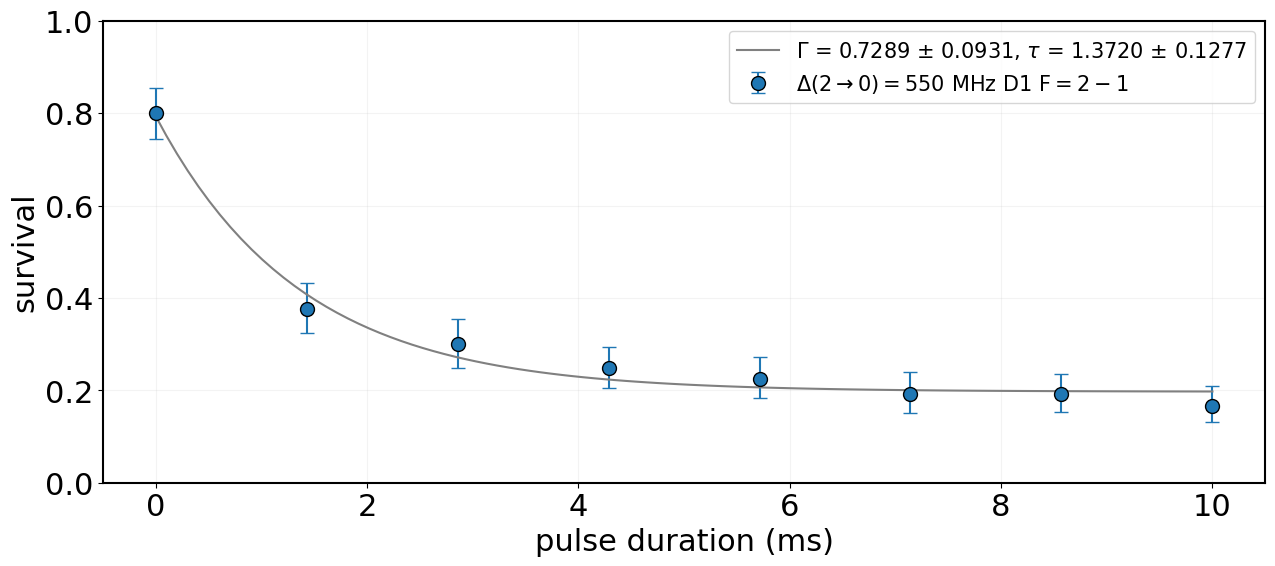

In [60]:
##pulse duration
reloadMyModules(28)
fileId = 22
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
avgTferData1[2] = 0.3
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 550 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_550 = decay_constant
gamma_550_unc = decay_constant_uncertainty
tau_550 = one_over_e_time
tau_550_unc = one_over_e_time_uncertainty

## 500 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:15:11: on (Y-M-D) 2023-8-28, And ended at 13:27:0: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

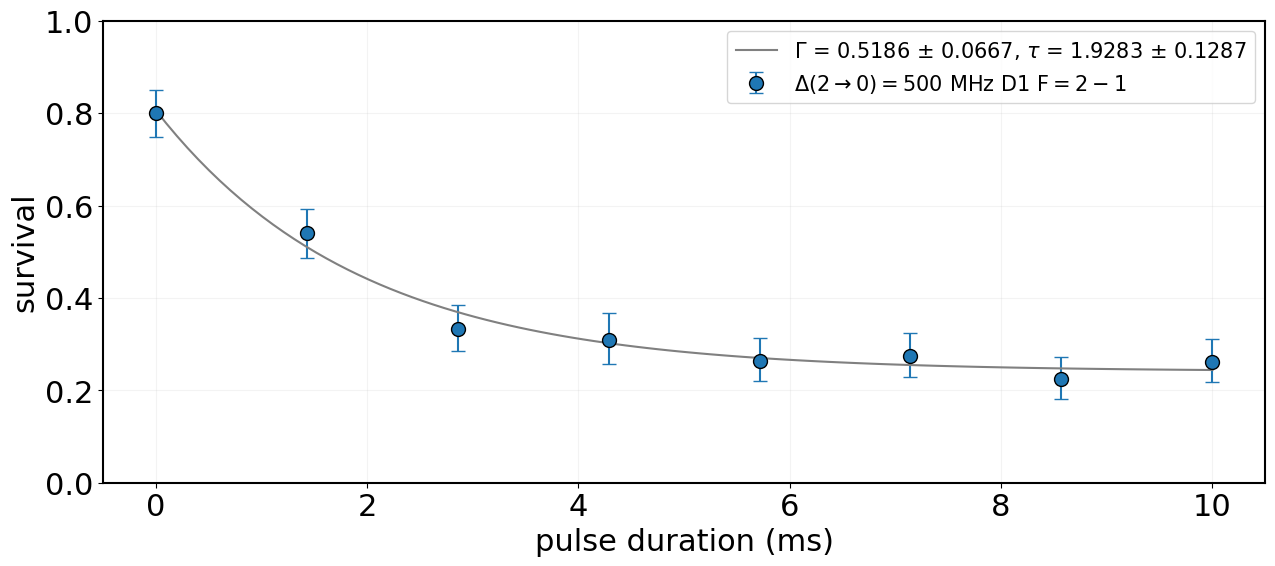

In [44]:
##pulse duration
reloadMyModules(28)
fileId = 21
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 500 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_500 = decay_constant
gamma_500_unc = decay_constant_uncertainty
tau_500 = one_over_e_time
tau_500_unc = one_over_e_time_uncertainty

## 450 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 11:42:15: on (Y-M-D) 2023-8-28, And ended at 11:54:11: on 2023-8-28
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

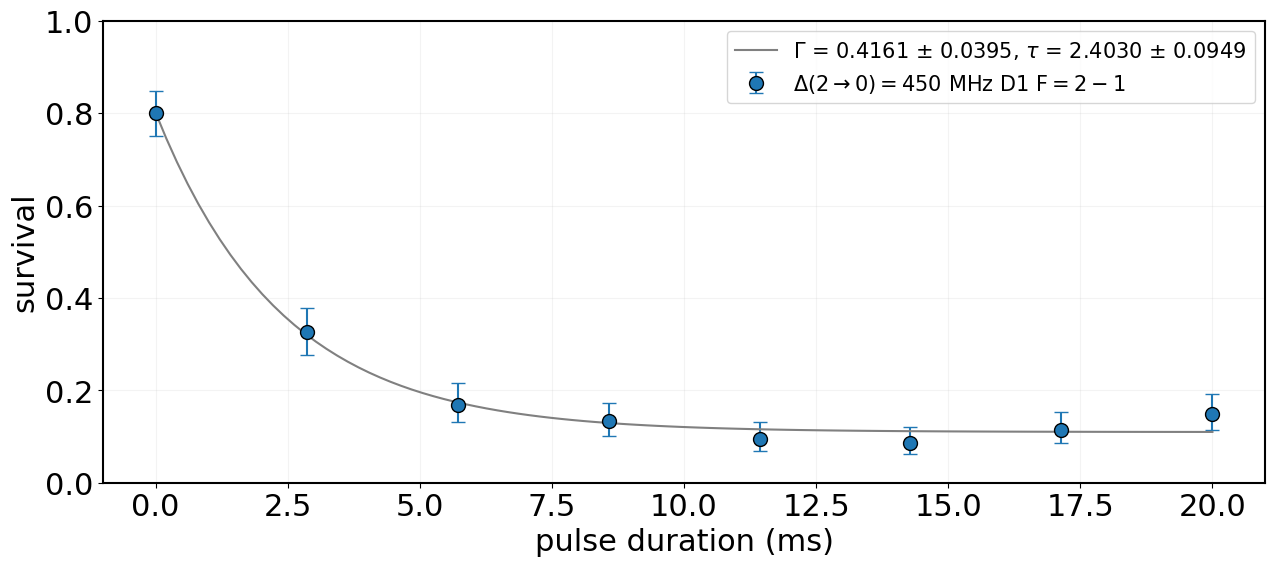

In [23]:
##pulse duration
reloadMyModules(28)
fileId = 15
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 450 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_450 = decay_constant
gamma_450_unc = decay_constant_uncertainty
tau_450 = one_over_e_time
tau_450_unc = one_over_e_time_uncertainty

## 400 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 11:29:37: on (Y-M-D) 2023-8-28, And ended at 11:41:34: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

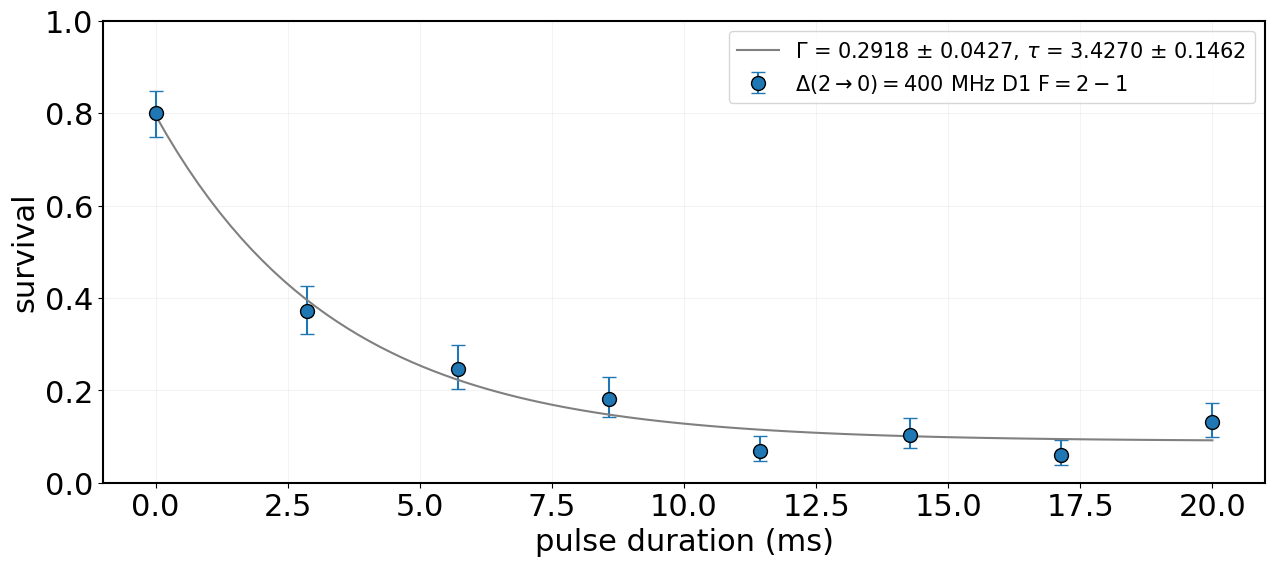

In [24]:
##pulse duration
reloadMyModules(28)
fileId = 14
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 400 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_400 = decay_constant
gamma_400_unc = decay_constant_uncertainty
tau_400 = one_over_e_time
tau_400_unc = one_over_e_time_uncertainty

## 350 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:27:1: on (Y-M-D) 2023-8-25, And ended at 14:38:52: on 2023-8-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

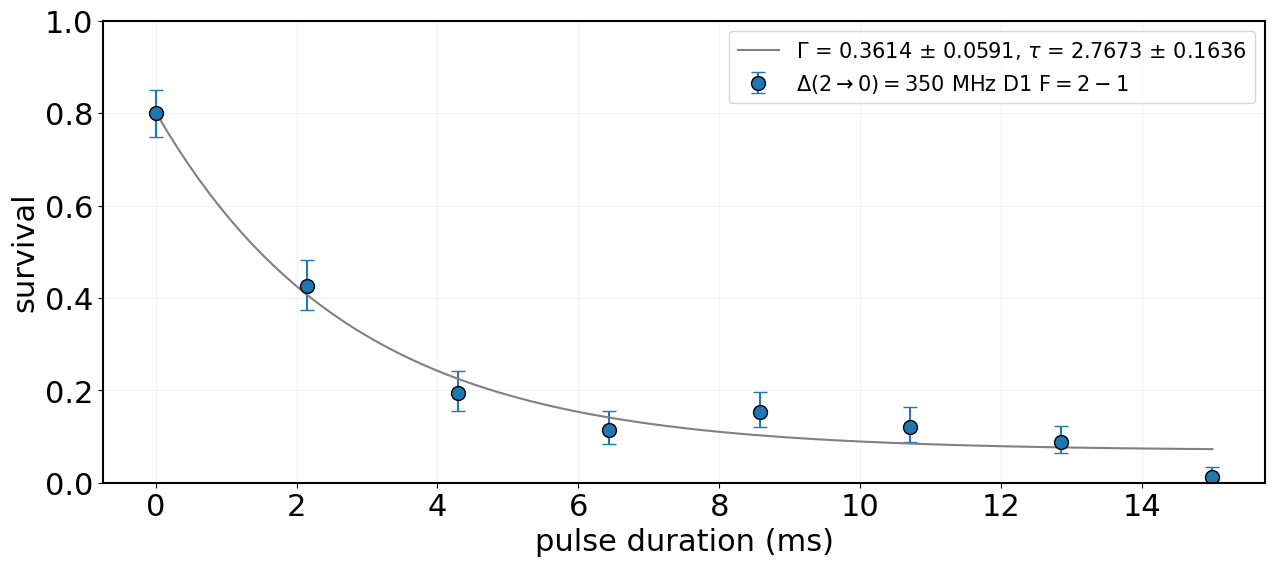

In [25]:
##pulse duration
reloadMyModules(25)
fileId = 19
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[2] = 0.18
# avgTferData1[7] = 0.1
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 350 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_350 = decay_constant
gamma_350_unc = decay_constant_uncertainty
tau_350 = one_over_e_time
tau_350_unc = one_over_e_time_uncertainty

## 300 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 12:55:10: on (Y-M-D) 2023-8-25, And ended at 13:7:5: on 2023-8-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

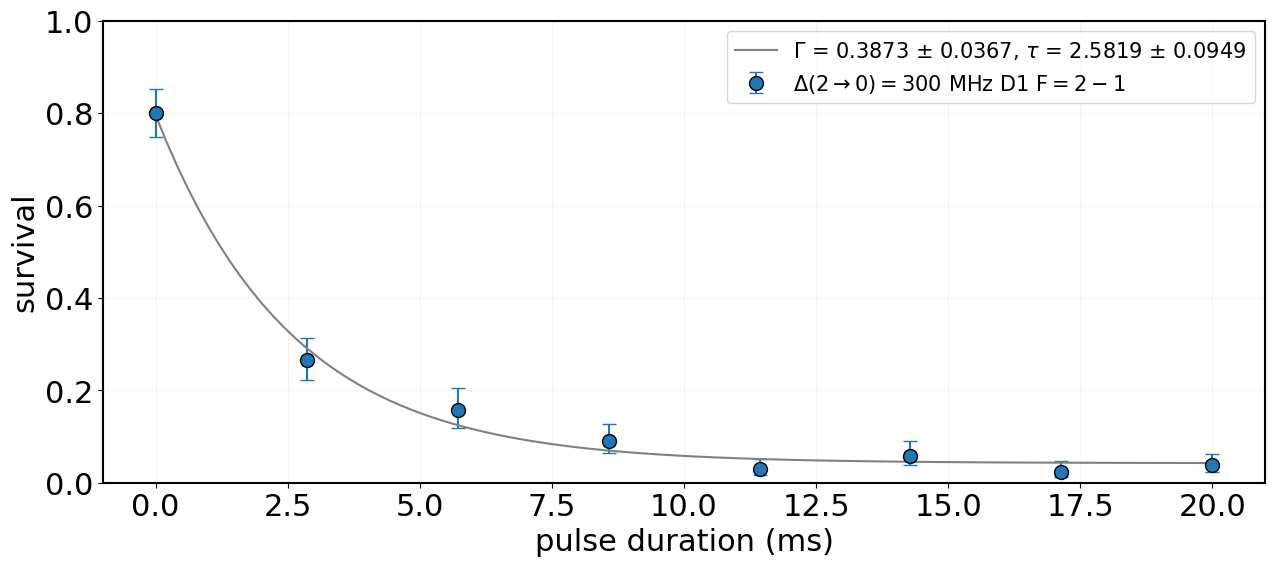

In [26]:
##pulse duration
reloadMyModules(25)
fileId = 15
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[2] = 0.18
# avgTferData1[7] = 0.05
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 300 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_300 = decay_constant
gamma_300_unc = decay_constant_uncertainty
tau_300 = one_over_e_time
tau_300_unc = one_over_e_time_uncertainty

## 250 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 11:14:15: on (Y-M-D) 2023-8-28, And ended at 11:26:11: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

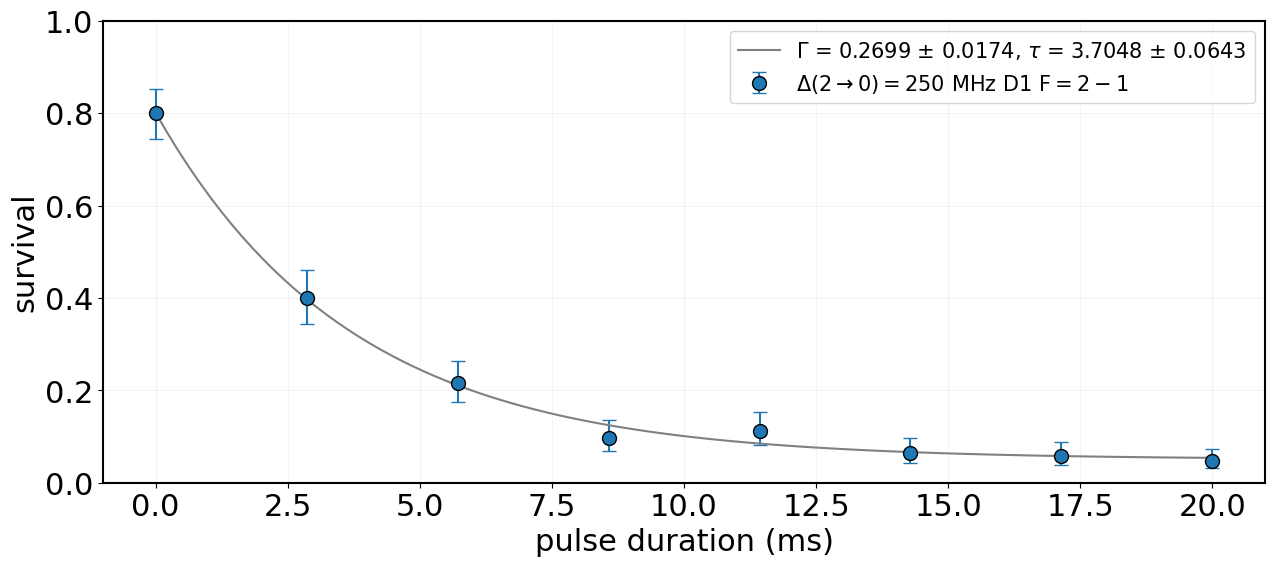

In [27]:
##pulse duration
reloadMyModules(28)
fileId = 13
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 250 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_250 = decay_constant
gamma_250_unc = decay_constant_uncertainty
tau_250 = one_over_e_time
tau_250_unc = one_over_e_time_uncertainty

## 200 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 10:59:25: on (Y-M-D) 2023-8-28, And ended at 11:11:22: on 2023-8-28
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

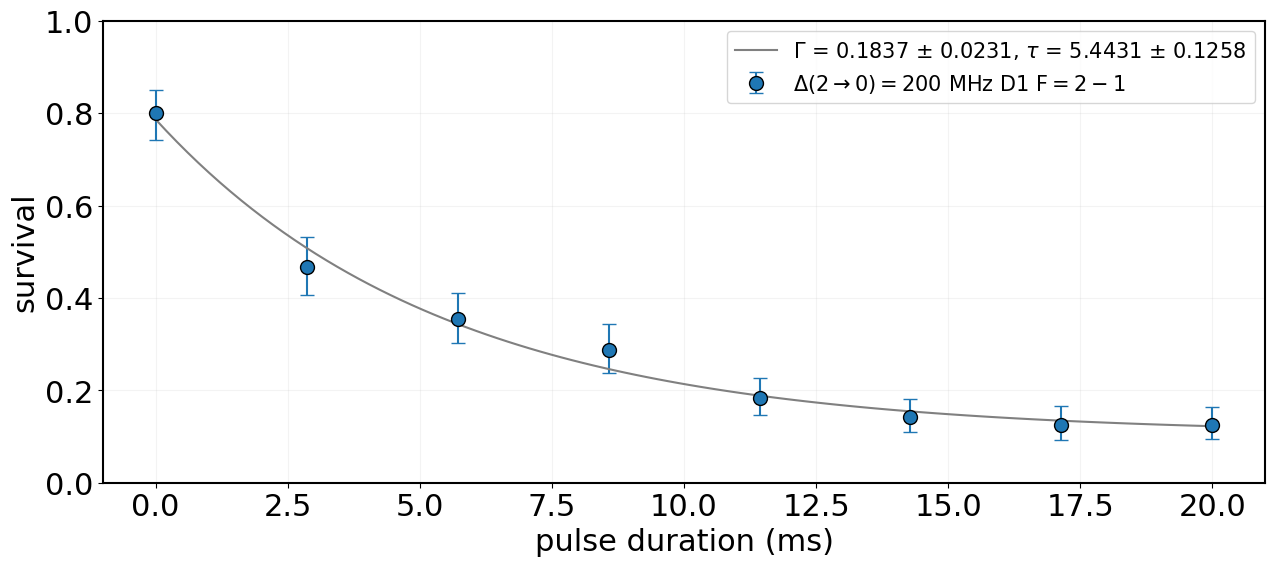

In [28]:
##pulse duration
reloadMyModules(28)
fileId = 12
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
# avgTferData1[6] = 0.12
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 200 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_200 = decay_constant
gamma_200_unc = decay_constant_uncertainty
tau_200 = one_over_e_time
tau_200_unc = one_over_e_time_uncertainty

## 175 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 10:46:49: on (Y-M-D) 2023-8-28, And ended at 10:58:45: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

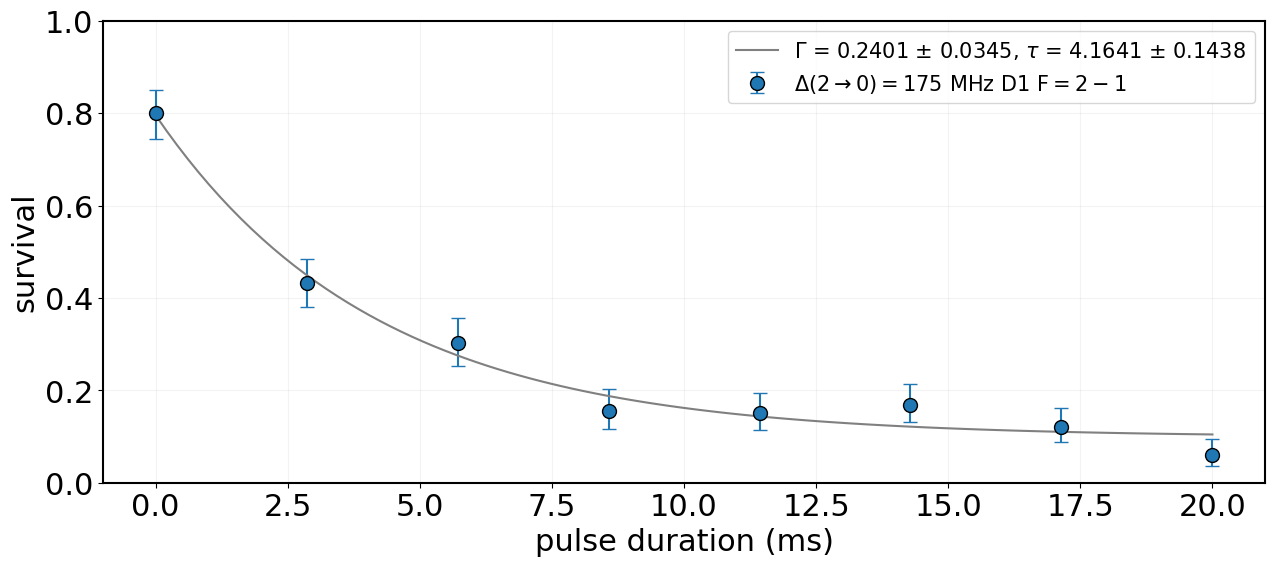

In [29]:
##pulse duration
reloadMyModules(28)
fileId = 11
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
avgTferData1[6] = 0.12
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 175 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_175 = decay_constant
gamma_175_unc = decay_constant_uncertainty
tau_175 = one_over_e_time
tau_175_unc = one_over_e_time_uncertainty

## 162.5 MHz

Number of Pictures: 4800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 300;	Exp File Version: 4;
Experiment started at (H:M:S) 16:18:47: on (Y-M-D) 2023-8-27, And ended at 16:36:12: on 2023-8-27
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

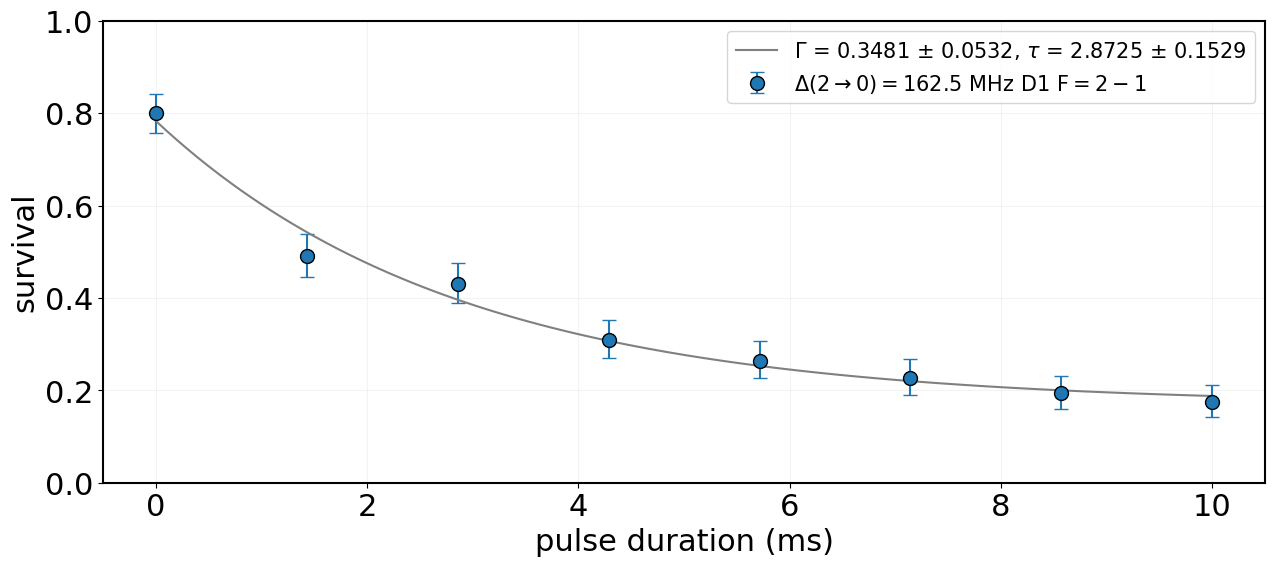

In [30]:
##pulse duration
reloadMyModules(27)
fileId = 4
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 162.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_162 = decay_constant
gamma_162_unc = decay_constant_uncertainty
tau_162 = one_over_e_time
tau_162_unc = one_over_e_time_uncertainty

## 150 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 9:59:27: on (Y-M-D) 2023-8-25, And ended at 10:11:15: on 2023-8-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

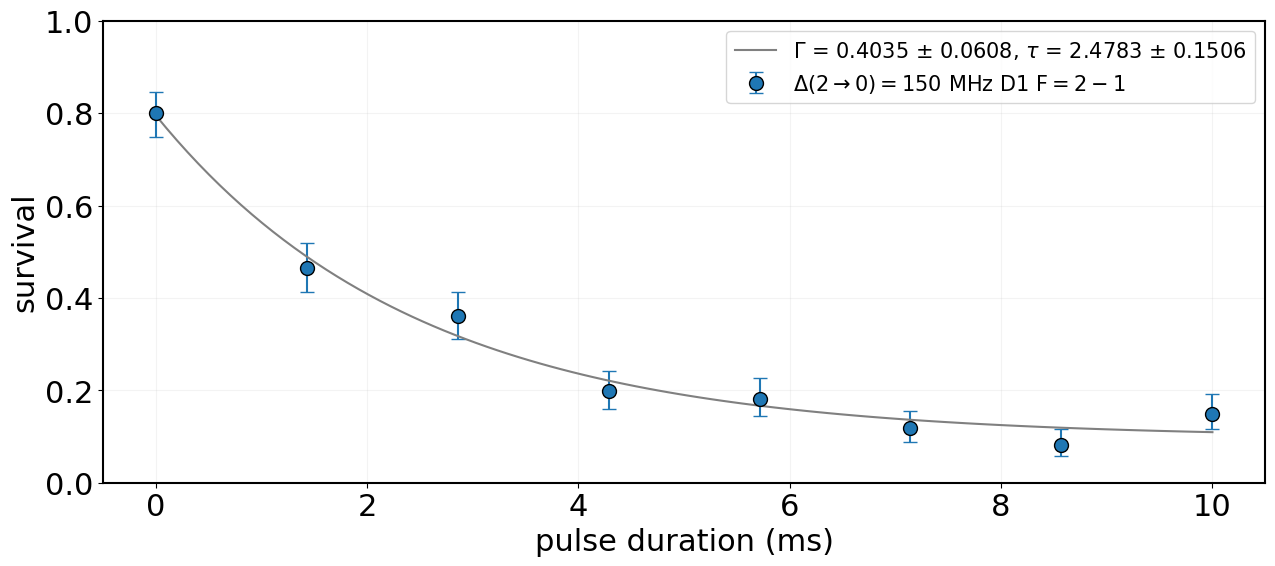

In [31]:
##pulse duration
reloadMyModules(25)
fileId = 5
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 150 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_150 = decay_constant
gamma_150_unc = decay_constant_uncertainty
tau_150 = one_over_e_time
tau_150_unc = one_over_e_time_uncertainty

## 137.5 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 10:10:11: on (Y-M-D) 2023-8-28, And ended at 10:22:3: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

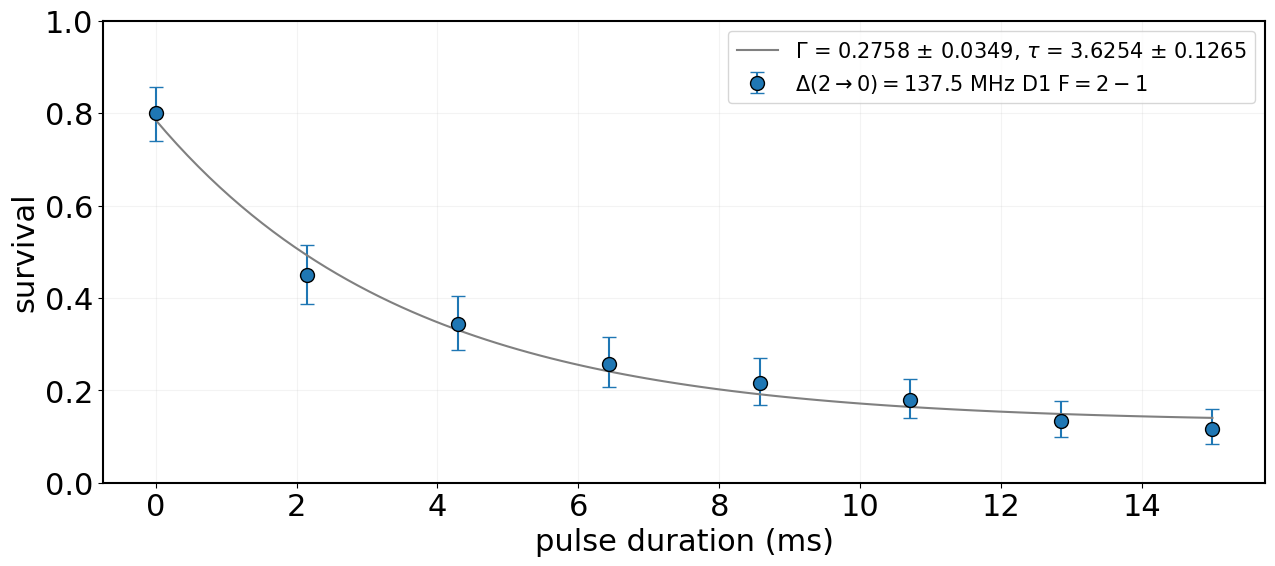

In [32]:
##pulse duration
reloadMyModules(28)
fileId = 9
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 137.5 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_137 = decay_constant
gamma_137_unc = decay_constant_uncertainty
tau_137 = one_over_e_time
tau_137_unc = one_over_e_time_uncertainty

## 125 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:45:47: on (Y-M-D) 2023-8-25, And ended at 14:57:41: on 2023-8-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

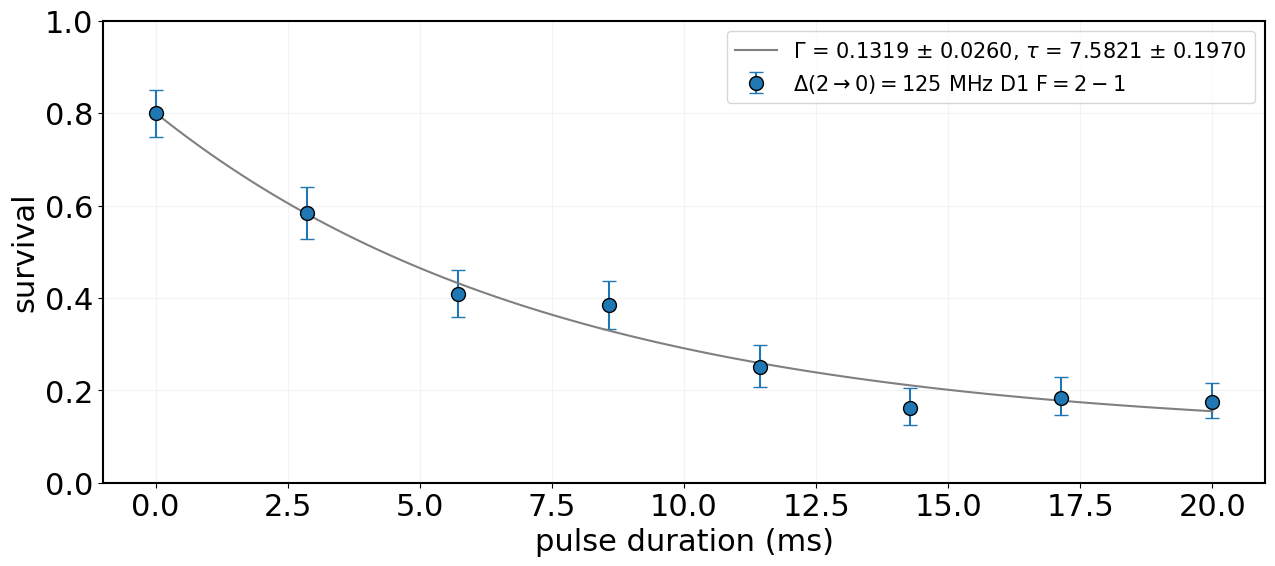

In [33]:
##pulse duration
reloadMyModules(25)
fileId = 21
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 125 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_125 = decay_constant
gamma_125_unc = decay_constant_uncertainty
tau_125 = one_over_e_time
tau_125_unc = one_over_e_time_uncertainty

## 100 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 15:27:27: on (Y-M-D) 2023-8-25, And ended at 15:39:47: on 2023-8-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

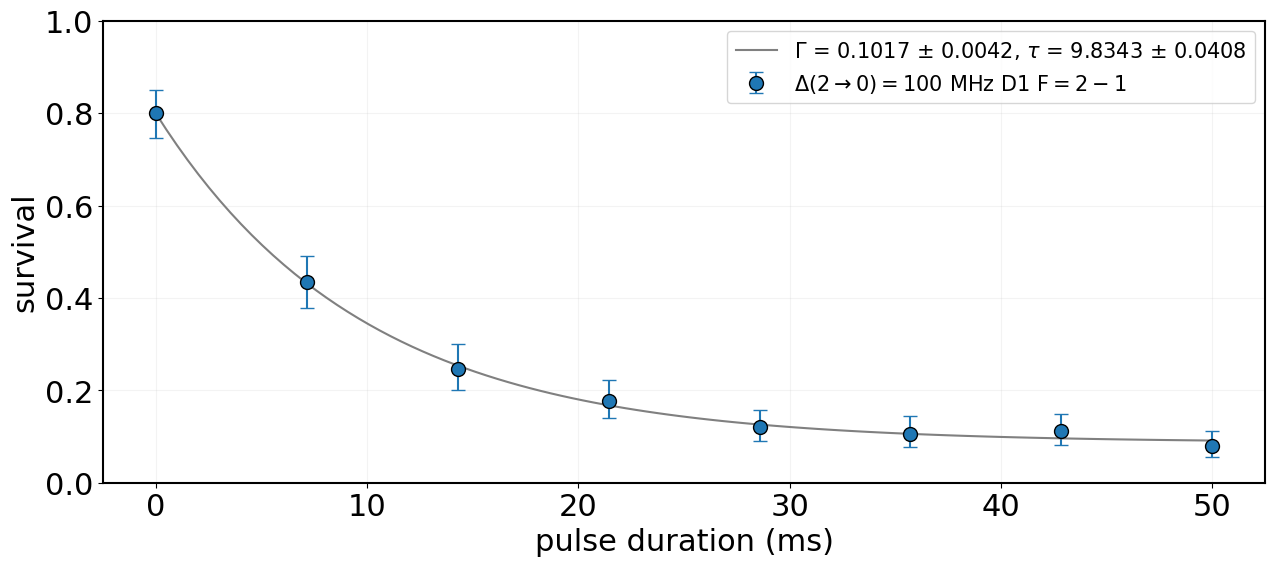

In [34]:
##pulse duration
reloadMyModules(25)
fileId = 24
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 100 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_100 = decay_constant
gamma_100_unc = decay_constant_uncertainty
tau_100 = one_over_e_time
tau_100_unc = one_over_e_time_uncertainty

## 75 MHz 

Number of Pictures: 4800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 300;	Exp File Version: 4;
Experiment started at (H:M:S) 12:38:23: on (Y-M-D) 2023-8-26, And ended at 12:57:35: on 2023-8-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

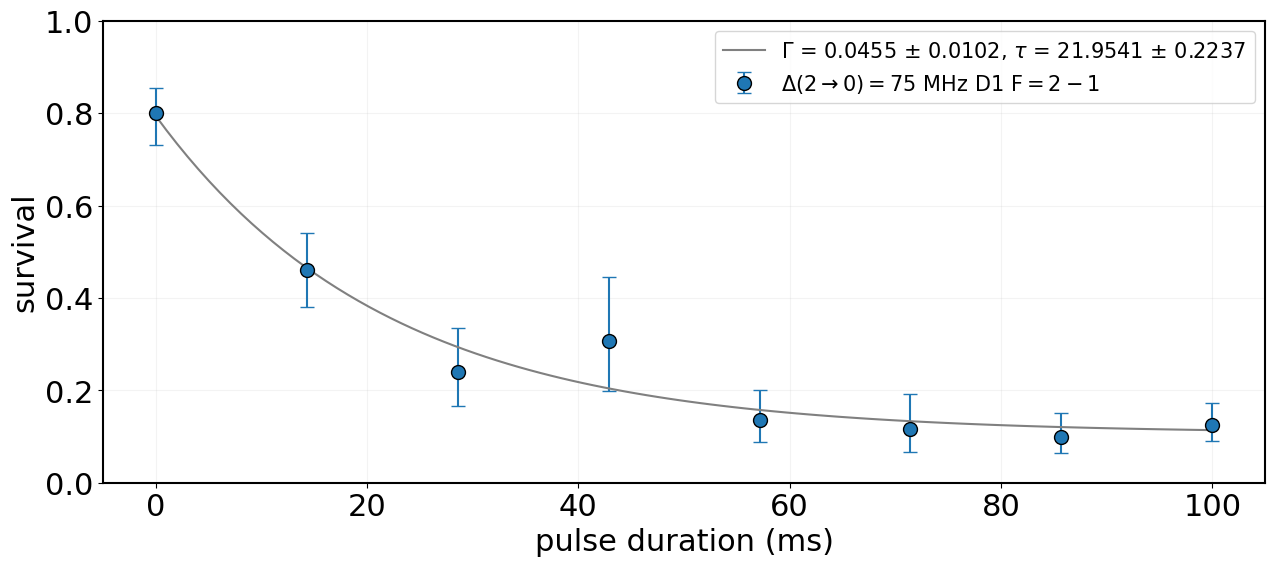

In [35]:
##pulse duration
reloadMyModules(26)
fileId = 4
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[3] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 75 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_75 = decay_constant
gamma_75_unc = decay_constant_uncertainty
tau_75 = one_over_e_time
tau_75_unc = one_over_e_time_uncertainty

## 50 MHz 

Number of Pictures: 4800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 300;	Exp File Version: 4;
Experiment started at (H:M:S) 13:16:8: on (Y-M-D) 2023-8-26, And ended at 13:35:20: on 2023-8-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

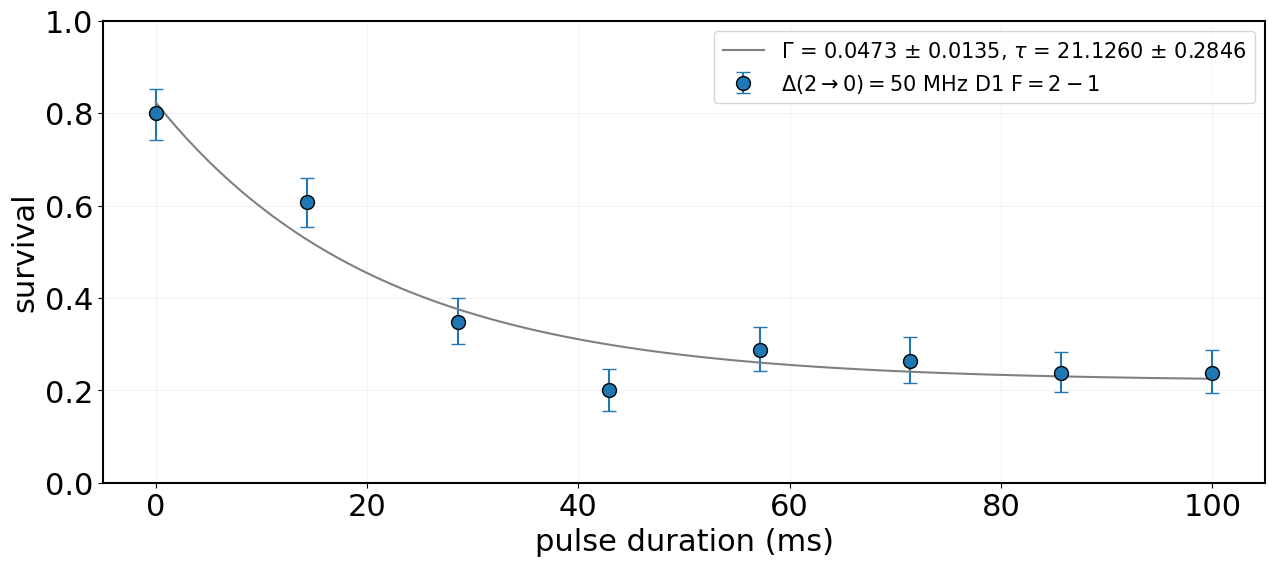

In [36]:
##pulse duration
reloadMyModules(26)
fileId = 6
threshold = 65
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
avgTferData1[3] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 50 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_50 = decay_constant
gamma_50_unc = decay_constant_uncertainty
tau_50 = one_over_e_time
tau_50_unc = one_over_e_time_uncertainty

## 25 MHz 

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:0:17: on (Y-M-D) 2023-8-26, And ended at 14:14:36: on 2023-8-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

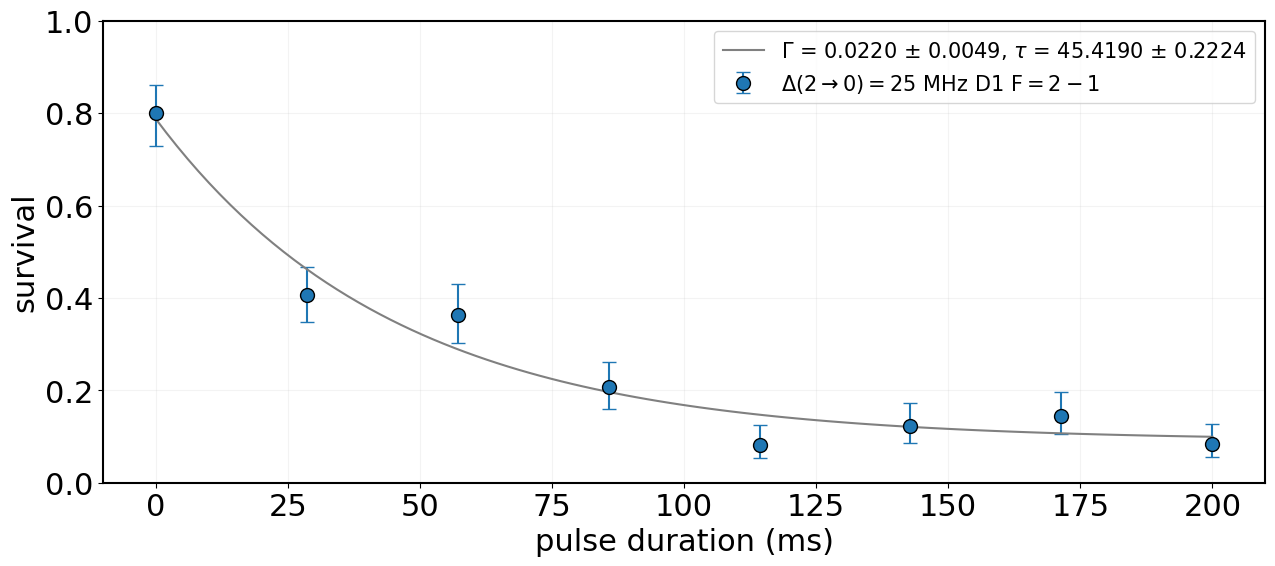

In [37]:
##pulse duration
reloadMyModules(26)
fileId = 8
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
# avgTferData1[3] = 0.2
# avgTferData1[7] = 0.15
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 25 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_25 = decay_constant
gamma_25_unc = decay_constant_uncertainty
tau_25 = one_over_e_time
tau_25_unc = one_over_e_time_uncertainty

# D1 F=2-1' red

## -200 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 22:7:24: on (Y-M-D) 2023-8-28, And ended at 22:19:11: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

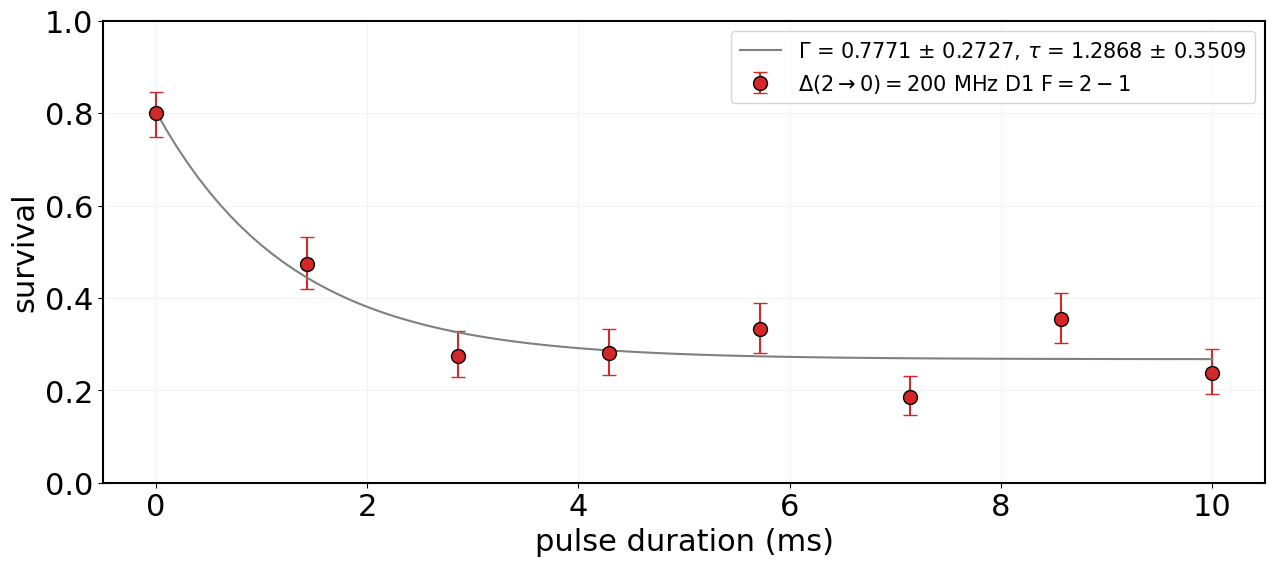

In [96]:
##pulse duration
reloadMyModules(28)
fileId = 35
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 200 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_200_red = decay_constant
gamma_200_unc_red = decay_constant_uncertainty
tau_200_red = one_over_e_time
tau_200_unc_red = one_over_e_time_uncertainty

## -250 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 22:47:57: on (Y-M-D) 2023-8-28, And ended at 22:59:53: on 2023-8-28
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

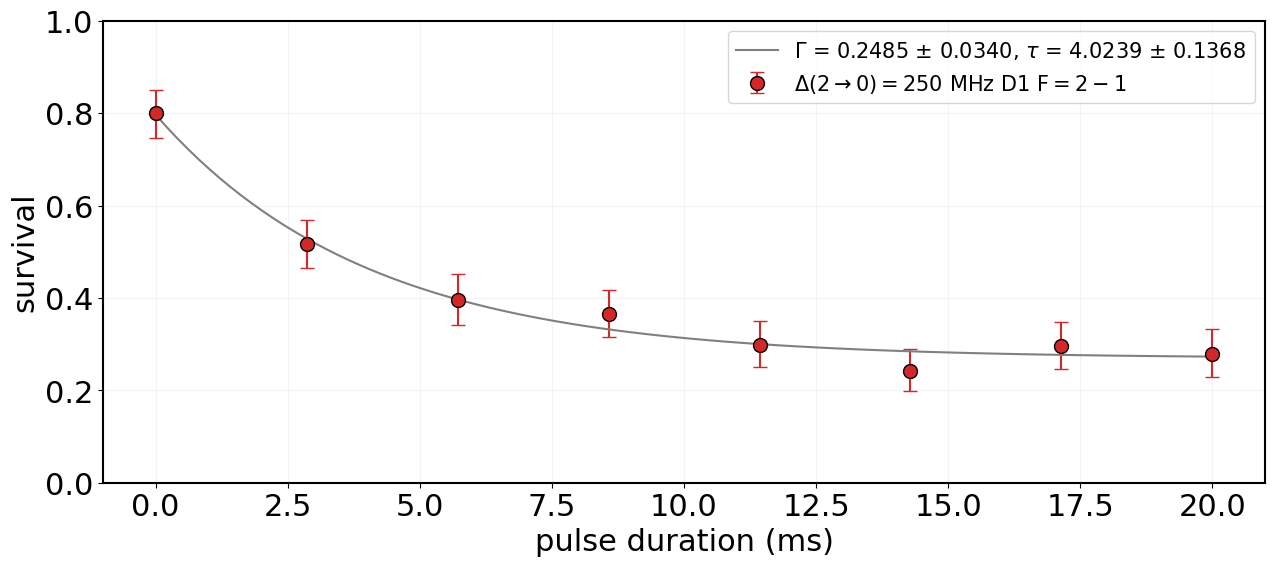

In [98]:
##pulse duration
reloadMyModules(28)
fileId = 37
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 250 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_250_red = decay_constant
gamma_250_unc_red = decay_constant_uncertainty
tau_250_red = one_over_e_time
tau_250_unc_red = one_over_e_time_uncertainty

## -300 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 9:2:31: on (Y-M-D) 2023-8-29, And ended at 9:14:24: on 2023-8-29
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

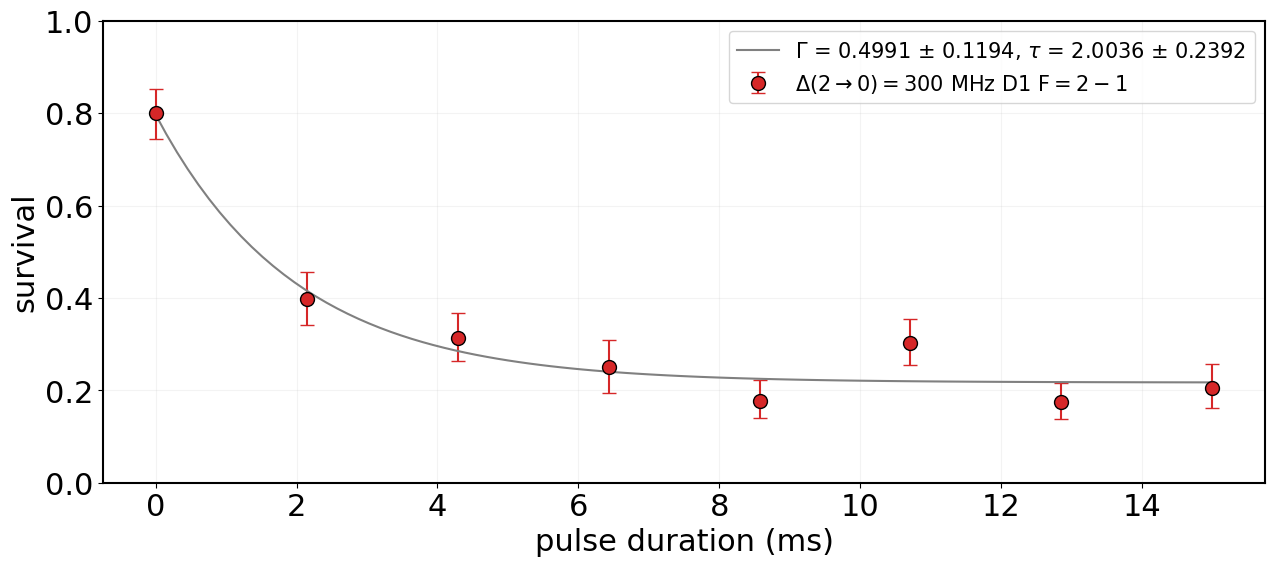

In [108]:
##pulse duration
reloadMyModules(29)
fileId = 6
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
avgTferData1[3] = 0.25
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 300 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_300_red = decay_constant
gamma_300_unc_red = decay_constant_uncertainty
tau_300_red = one_over_e_time
tau_300_unc_red = one_over_e_time_uncertainty

## -350 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 7:16:6: on (Y-M-D) 2023-8-29, And ended at 7:28:5: on 2023-8-29
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

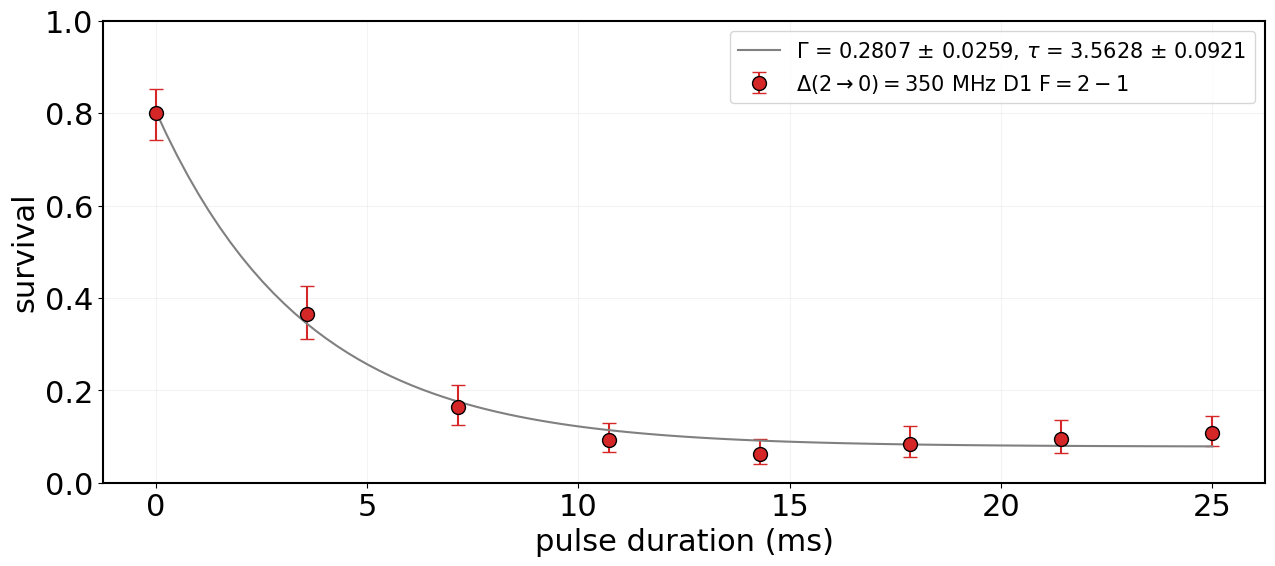

In [110]:
##pulse duration
reloadMyModules(29)
fileId = 2
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 350 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_350_red = decay_constant
gamma_350_unc_red = decay_constant_uncertainty
tau_350_red = one_over_e_time
tau_350_unc_red = one_over_e_time_uncertainty

## -400 MHz

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 7:33:16: on (Y-M-D) 2023-8-29, And ended at 7:45:15: on 2023-8-29
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

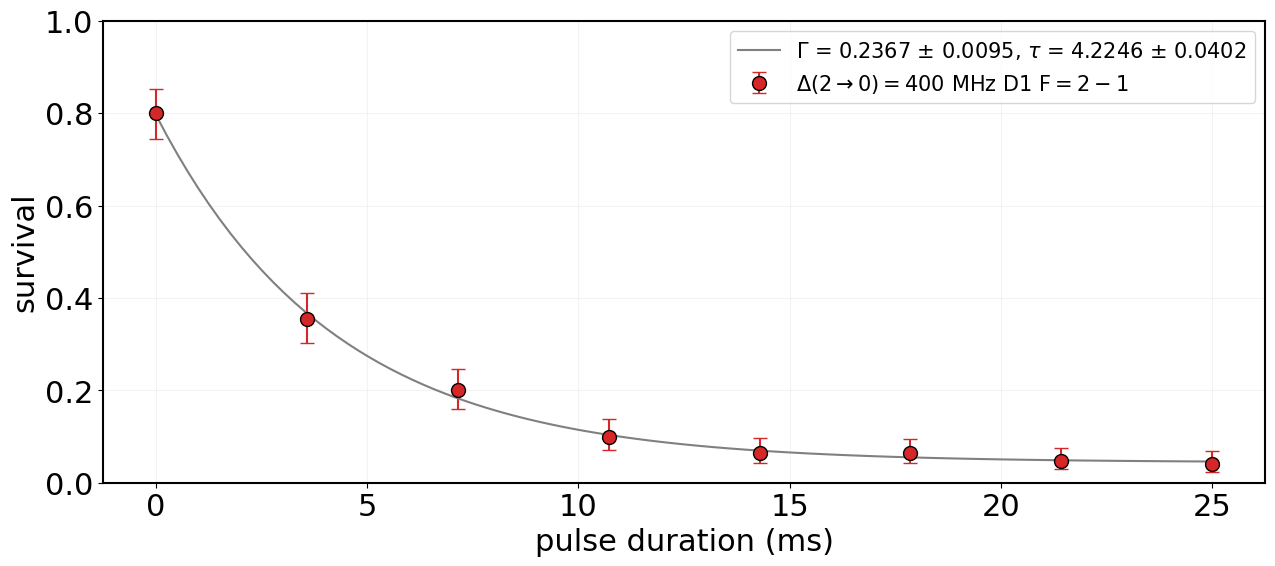

In [104]:
##pulse duration
reloadMyModules(29)
fileId = 3
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 400 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 

gamma_400_red = decay_constant
gamma_400_unc_red = decay_constant_uncertainty
tau_400_red = one_over_e_time
tau_400_unc_red = one_over_e_time_uncertainty

# rate plot

In [41]:
def trapVolume(gamma,trap_depth,T): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 850e-9
    w_0 = 0.7e-6 # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    w_r = 130000*(2*np.pi)
    w_a = 25000*(2*np.pi)
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*mc.k_B * T/(mc.Rb87_M*w**2))**(3/2))*1e6
    beta = gamma*1e3*2*np.sqrt(2)*V
    print('volume',V,'beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    return V

volume 2.310670891643076e-14 beta 6.53556422628474e-11 130000.00000000001 25000.0


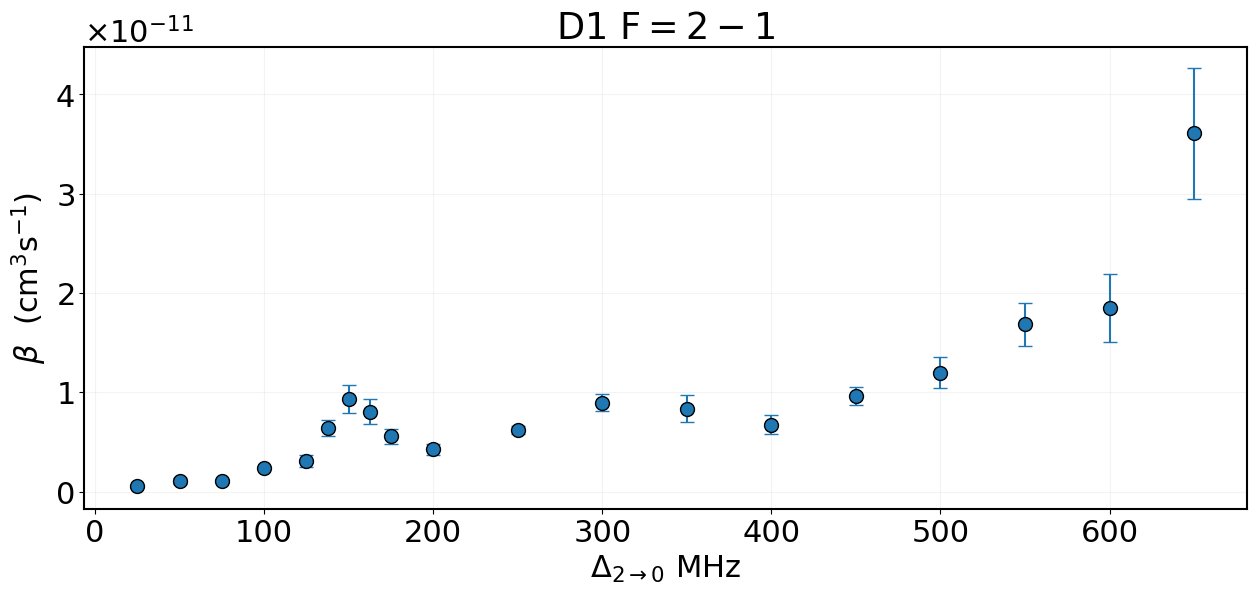

In [83]:
detuning = [25,50,75,100,125,137.5, 150,162.5,175,200,250,300,350,400,450,500,550,600,650]
# ls_detuning = [freq-17+48 for freq in detuning]
# print(ls_detuning)
decay_rate = [gamma_25,gamma_50, gamma_75, gamma_100,gamma_125,gamma_137, gamma_150,gamma_162, gamma_175,
              gamma_200,gamma_250,gamma_300,gamma_350,gamma_400,gamma_450,gamma_500,gamma_550,gamma_600,gamma_650]
decay_rate_unc = [gamma_25_unc, gamma_50_unc,gamma_75_unc,gamma_100_unc,gamma_125_unc,gamma_137_unc,gamma_150_unc,
              gamma_162_unc,gamma_175_unc,gamma_200_unc,gamma_250_unc,gamma_300_unc,gamma_350_unc,
                  gamma_400_unc,gamma_450_unc,gamma_500_unc,gamma_550_unc,gamma_600_unc,gamma_650_unc]

decay_rate_error_bar = [decay_rate_unc,decay_rate_unc]

volume_cm3 = trapVolume(1,0.85e-3,30e-6)
beta = [gamma*volume_cm3*1e3 for gamma in decay_rate]
beta_unc = [gamma_unc*volume_cm3*1e3 for gamma_unc in decay_rate_unc]
beta_error = [beta_unc,beta_unc]
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(detuning,beta, yerr=beta_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)

# Use ScalarFormatter for the y-axis labels
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))  # Adjust the scilimits as needed
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\Delta_{2 \rightarrow 0} \ \mathrm{MHz}$')
plt.title(r'$\mathrm{D1 \ F=2-1}$') 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 11:6:53: on (Y-M-D) 2023-8-25, And ended at 11:18:39: on 2023-8-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

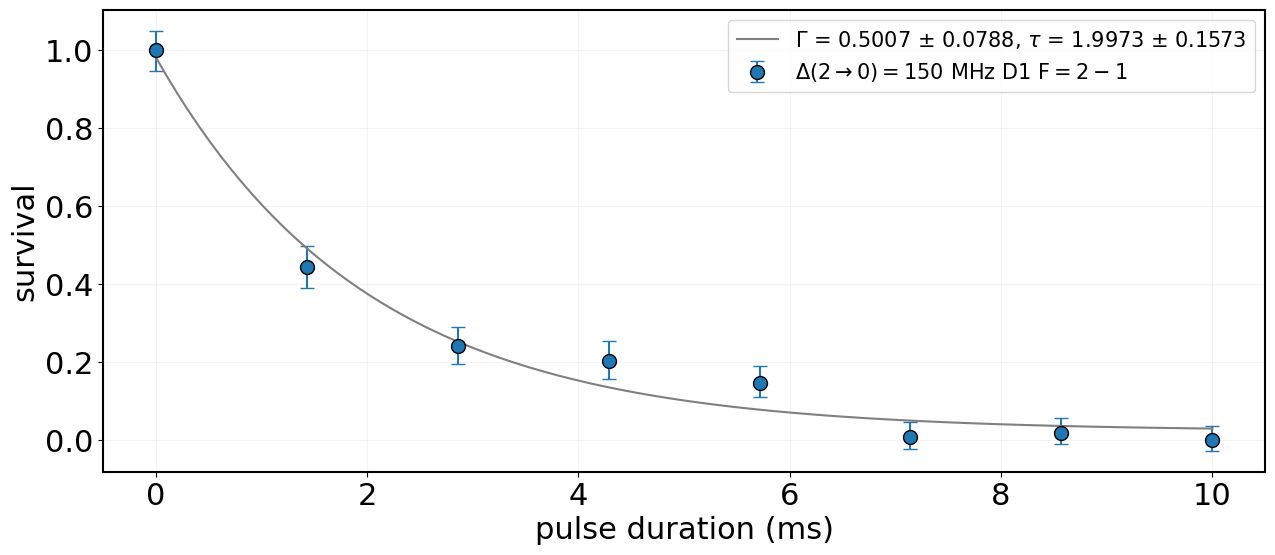

In [48]:
##pulse duration

fileId = 8
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.8
limit = min(avgTferData1)
# avgTferData1[5] = 0.2
# avgTferData1[7] = 0.15


x_data = key1
y_data = (avgTferData1-limit)/(.8-limit)
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"


legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,(avgTferData1-limit)/(.8-limit), yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 150 \ \mathrm{MHz} \ \mathrm{D1 \ F=2-1} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
# plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
